In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load CSV file
file_path = "/content/drive/My Drive/PCOS/PCOS_data.csv"
dataset = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:

print(dataset.head())
print('')
print(dataset.shape)

   OutCome   Age   Weight   Height   BMI  Blood Group  Pulse rate  RR      Hb  \
0        0     28     44.6   152.0  19.3           15          78   22  10.48   
1        0     36     65.0   161.5  24.9           15          74   20  11.70   
2        1     33     68.8   165.0  25.3           11          72   18  11.80   
3        0     37     65.0   148.0  29.7           13          72   20  12.00   
4        0     25     52.0   161.0  20.1           11          72   18  10.00   

   Cycle  ...  Fast food  Reg.Exercise  BP _Systolic  BP _Diastolic   \
0      2  ...        1.0             0           110              80   
1      2  ...        0.0             0           120              70   
2      2  ...        1.0             0           120              80   
3      2  ...        0.0             0           120              70   
4      2  ...        0.0             0           120              80   

   Follicle No. (L) Follicle No. (R)  Avg. F size (L)   Avg. F size (R)   \
0   

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical


In [5]:
pip show keras

Name: keras
Version: 3.8.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [6]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [7]:
data_load =dataset.drop(['Unnamed: 42'], axis=1)
x1=np.array(data_load.iloc[:,1:])
y=np.array(data_load.iloc[:,0])
print(x1.shape)
print(y.shape)

(541, 41)
(541,)


In [8]:
for colum in data_load.columns:
  print(colum)

OutCome
 Age 
Weight 
Height
BMI
Blood Group
Pulse rate
RR 
Hb
Cycle
Cycle length
Marraige Status 
Pregnant
abortions
  I   beta-HCG
II    beta-HCG
FSH
LH
FSH/LH
Hip
Waist
Waist:Hip Ratio
TSH 
AMH
PRL
Vit D3 
PRG
RBS
Weight gain
hair growth
Skin darkening 
Hair loss
Pimples
Fast food
Reg.Exercise
BP _Systolic
BP _Diastolic 
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) 
Avg. F size (R) 
Endometrium


In [9]:
data_load.describe

<bound method NDFrame.describe of      OutCome   Age   Weight    Height   BMI  Blood Group  Pulse rate  RR   \
0          0     28     44.6  152.000  19.3           15          78   22   
1          0     36     65.0  161.500  24.9           15          74   20   
2          1     33     68.8  165.000  25.3           11          72   18   
3          0     37     65.0  148.000  29.7           13          72   20   
4          0     25     52.0  161.000  20.1           11          72   18   
..       ...    ...      ...      ...   ...          ...         ...  ...   
536        0     35     50.0  164.592  18.5           17          72   16   
537        0     30     63.2  158.000  25.3           15          72   18   
538        0     36     54.0  152.000  23.4           13          74   20   
539        0     27     50.0  150.000  22.2           15          74   20   
540        1     23     82.0  165.000  30.1           13          80   20   

        Hb  Cycle  ...  Pimples  Fast food  Reg.Exercise  BP _Systolic  \
0    10.48      2  ...        0        1.0             0           110   
1    11.70      2  ...        0        0.0             0           120   
2    11.80      2  ...        1        1.0             0           120   
3    12.00      2  ...        0        0.0             0           120   
4    10.00      2  ...        0        0.0             0           120   
..     ...    ...  ...      ...        ...           ...           ...   
536  11.00      2  ...        0        0.0             0           110   
537  10.80      2  ...        0        0.0             0           110   
538  10.80      2  ...        0        0.0             0           110   
539  12.00      4  ...        1        0.0             0           110   
540  10.20      4  ...        1        1.0             0           120   

     BP _Diastolic  Follicle No. (L)  Follicle No. (R)  Avg. F size (L)   \
0                80                3                 3              18.0   
1                70                3                 5              15.0   
2                80               13                15              18.0   
3                70                2                 2              15.0   
4                80                3                 4              16.0   
..              ...              ...               ...               ...   
536              70                1                 0              17.5   
537              70                9                 7              19.0   
538              80                1                 0              18.0   
539              70                7                 6              18.0   
540              70                9                10              19.0   

     Avg. F size (R)   Endometrium  
0                18.0          8.5  
1                14.0          3.7  
2                20.0         10.0  
3                14.0          7.5  
4                14.0          7.0  
..                ...          ...  
536              10.0          6.7  
537              18.0          8.2  
538               9.0          7.3  
539              16.0         11.5  
540              18.0          6.9  

[541 rows x 42 columns]>

In [33]:
data = data_load.copy()

In [36]:
#droping the irrelevent columns
dummy=data_load.iloc[:,1:2]
dummy.shape
#data=data.drop(['Sl. No','Patient File No.'], axis=1)
dataset=data_load.drop(dummy, axis=1)
data.shape

(541, 42)

In [13]:
dataset.describe

<bound method NDFrame.describe of      OutCome  Weight    Height   BMI  Blood Group  Pulse rate  RR      Hb  \
0          0     44.6  152.000  19.3           15          78   22  10.48   
1          0     65.0  161.500  24.9           15          74   20  11.70   
2          1     68.8  165.000  25.3           11          72   18  11.80   
3          0     65.0  148.000  29.7           13          72   20  12.00   
4          0     52.0  161.000  20.1           11          72   18  10.00   
..       ...      ...      ...   ...          ...         ...  ...    ...   
536        0     50.0  164.592  18.5           17          72   16  11.00   
537        0     63.2  158.000  25.3           15          72   18  10.80   
538        0     54.0  152.000  23.4           13          74   20  10.80   
539        0     50.0  150.000  22.2           15          74   20  12.00   
540        1     82.0  165.000  30.1           13          80   20  10.20   

     Cycle  Cycle length  ...  Pimples  Fast food  Reg.Exercise  BP _Systolic  \
0        2             5  ...        0        1.0             0           110   
1        2             5  ...        0        0.0             0           120   
2        2             5  ...        1        1.0             0           120   
3        2             5  ...        0        0.0             0           120   
4        2             5  ...        0        0.0             0           120   
..     ...           ...  ...      ...        ...           ...           ...   
536      2             5  ...        0        0.0             0           110   
537      2             5  ...        0        0.0             0           110   
538      2             6  ...        0        0.0             0           110   
539      4             2  ...        1        0.0             0           110   
540      4             7  ...        1        1.0             0           120   

    BP _Diastolic   Follicle No. (L)  Follicle No. (R)  Avg. F size (L)   \
0               80                 3                 3              18.0   
1               70                 3                 5              15.0   
2               80                13                15              18.0   
3               70                 2                 2              15.0   
4               80                 3                 4              16.0   
..             ...               ...               ...               ...   
536             70                 1                 0              17.5   
537             70                 9                 7              19.0   
538             80                 1                 0              18.0   
539             70                 7                 6              18.0   
540             70                 9                10              19.0   

     Avg. F size (R)   Endometrium  
0                18.0          8.5  
1                14.0          3.7  
2                20.0         10.0  
3                14.0          7.5  
4                14.0          7.0  
..                ...          ...  
536              10.0          6.7  
537              18.0          8.2  
538               9.0          7.3  
539              16.0         11.5  
540              18.0          6.9  

[541 rows x 41 columns]>

In [29]:
data = data_load.copy()

In [37]:
#removing the unwanted data points
# data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)
index = data[data['AMH'] == 'a'].index
# index = df[df['Character Name'] == 'Spellman'].index
data.drop(index, inplace=True)
#df['object_column'] = df['int_column'].astype(str).astype(int)
data['II    beta-HCG'] = data['II    beta-HCG'].replace('1.99.', '1.99')
data['II    beta-HCG']=data['II    beta-HCG'].astype(float)
data.dtypes

,0
OutCome,int64
Age,int64
Weight,float64
Height,float64
BMI,float64
Blood Group,int64
Pulse rate,int64
RR,int64
Hb,float64
Cycle,int64


In [38]:
data['AMH'] = data['AMH'].astype(float)

In [39]:
data.isnull().sum()

,0
OutCome,0
Age,0
Weight,0
Height,0
BMI,0
Blood Group,0
Pulse rate,0
RR,0
Hb,0
Cycle,0


In [40]:
data=data.dropna()

In [41]:
x1=np.array(data.iloc[:,1:])
y=np.array(data.iloc[:,0])
print(x1.shape)
print(y.shape)

(538, 41)
(538,)


In [42]:
data.corr()

,OutCome,Age,Weight,Height,BMI,Blood Group,Pulse rate,RR,Hb,Cycle,...,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size (R),Endometrium
OutCome,1.000000,-0.171349,0.209969,0.065465,0.198854,0.033701,0.092699,0.038641,0.087809,0.401837,...,0.290335,0.380985,0.071979,0.007923,0.033562,0.601208,0.650929,1.299969e-01,0.094528,0.107639
Age,-0.171349,1.000000,-0.030984,-0.119885,0.020051,-0.011836,0.045634,0.088748,-0.023686,-0.085473,...,-0.034990,-0.034234,-0.025916,0.072437,0.066779,-0.113809,-0.158386,-2.096918e-02,-0.082677,-0.100115
Weight,0.209969,-0.030984,1.000000,0.419808,0.901806,0.071354,0.020101,0.045339,0.009363,0.201575,...,0.064817,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452
Height,0.065465,-0.119885,0.419808,1.000000,-0.006880,0.039409,-0.073608,-0.030492,0.025962,-0.021780,...,0.064912,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273
BMI,0.198854,0.020051,0.901806,-0.006880,1.000000,0.060550,0.050266,0.063902,0.002888,0.235623,...,0.044740,0.159935,-0.078480,0.070650,0.138603,0.142626,0.104735,-1.370214e-02,-0.113061,0.010980
Blood Group,0.033701,-0.011836,0.071354,0.039409,0.060550,1.000000,0.047865,-0.022707,-0.001652,0.123310,...,0.040382,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257
Pulse rate,0.092699,0.045634,0.020101,-0.073608,0.050266,0.047865,1.000000,0.305676,-0.052796,0.103416,...,-0.004395,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456
RR,0.038641,0.088748,0.045339,-0.030492,0.063902,-0.022707,0.305676,1.000000,-0.038693,0.012769,...,0.032356,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551
Hb,0.087809,-0.023686,0.009363,0.025962,0.002888,-0.001652,-0.052796,-0.038693,1.000000,0.040443,...,0.051089,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,3.087933e-02,0.023528,-0.063592
Cycle,0.401837,-0.085473,0.201575,-0.021780,0.235623,0.123310,0.103416,0.012769,0.040443,1.000000,...,0.129362,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,3.437944e-02,0.015318,0.039612


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x1, y, test_size = 0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(430, 41)
(108, 41)
(430,)
(108,)


In [44]:
model_ann1=Sequential()
model_ann1.add(Dense(32,input_dim=40, kernel_initializer='uniform', activation="tanh"))
model_ann1.add(Dense(16, kernel_initializer='uniform', activation="tanh"))
model_ann1.add(Dense(1, kernel_initializer='uniform', activation="sigmoid"))
model_ann1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
class CustomModel:
  def __init__(self):
      self.dense1=Dense(32, kernel_initializer='uniform', activation="tanh")
      self.dense2=Dense(16, kernel_initializer='uniform', activation="tanh")
      self.dense3=Dense(1, kernel_initializer='uniform', activation="sigmoid")

  def call(self,shape):
      # Change the input shape to 41 to match the data
      self.inp=Input(shape)
      x=self.dense1(self.inp)
      x=self.dense2(x)
      final=self.dense3(x)
      model=Model(inputs=self.inp, outputs=final)
      return model

m=CustomModel()
# Pass the updated shape (41,) to the call method
model_ann3=m.call(shape=(41,))
model_ann3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
print(X_train.shape, X_test.shape)

(430, 41) (108, 41)


In [54]:
model_ann3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_ann=model_ann3.fit(X_train,y_train,epochs=200, batch_size=12,validation_data=(X_test,y_test), verbose=1)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7743 - loss: 0.6850 - val_accuracy: 0.8148 - val_loss: 0.6268
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.5554 - val_accuracy: 0.8333 - val_loss: 0.4338
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9152 - loss: 0.3443 - val_accuracy: 0.8333 - val_loss: 0.3867
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9252 - loss: 0.2442 - val_accuracy: 0.8333 - val_loss: 0.4162
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9488 - loss: 0.1894 - val_accuracy: 0.8241 - val_loss: 0.4442
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9473 - loss: 0.1595 - val_accuracy: 0.8148 - val_loss: 0.4822
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9442 - loss: 0.1676 - val_accuracy: 0.8148 - val_loss: 0.5129
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1491 - val_accuracy: 0.8148 - 

In [55]:
score=model_ann3.evaluate(X_test,y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.943744957447052
Test accuracy: 0.7870370149612427


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0, 0.5, 'acc')

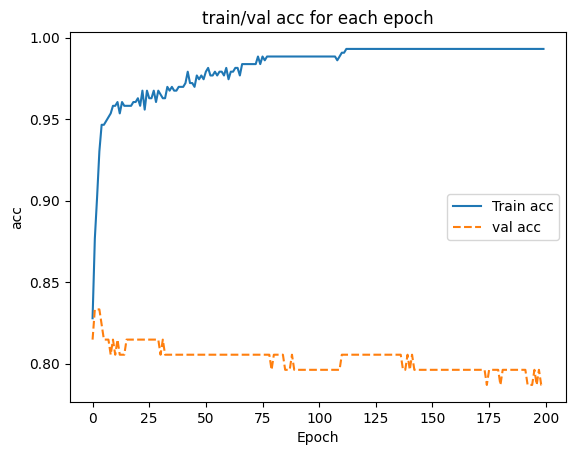

In [56]:
print(history_ann.history.keys())
import matplotlib.pyplot as plt
f,ax=plt.subplots()
ax.plot(history_ann.history['accuracy'])
ax.plot(history_ann.history['val_accuracy'], '--')
ax.legend(['Train acc','val acc'])
ax.set_title('train/val acc for each epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')